In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

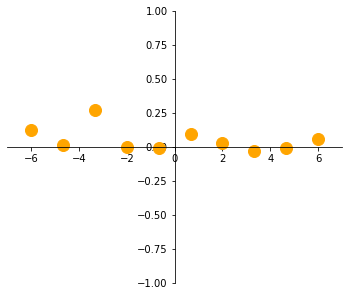

In [2]:
plt.figure(figsize=(6, 5))

ax=plt.subplot(111)

xx=np.linspace(-6,6,10)
yy=np.random.randn(len(xx))*0.1
ax.plot(xx,yy,color='orange', marker='o', linestyle='none', linewidth=2, markersize=12)

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

#ax.set_aspect('equal')
ax.axis([-7,7,-1,1])

plt.savefig('lec15_1.eps',bbox_inches='tight')
plt.show()

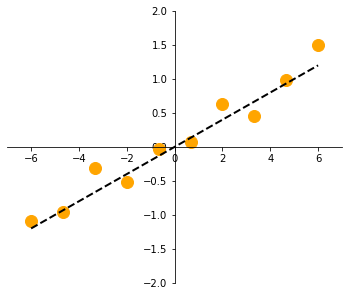

In [3]:
plt.figure(figsize=(6, 5))

ax2=plt.subplot(111)

xx1=np.linspace(-6,6,10)
yy1=0.2*xx1+np.random.randn(len(xx))*0.2
yy2=0.2*xx1
ax2.plot(xx1,yy1,color='orange', marker='o', linestyle='none', linewidth=2, markersize=12)
ax2.plot(xx1,yy2,color='black',  linestyle='dashed', linewidth=2, markersize=12)

# set the x-spine (see below for more info on `set_position`)
ax2.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()
# set the y-spine
ax2.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()

#ax.set_aspect('equal')
ax2.axis([-7,7,-2,2])

plt.savefig('lec15_2.eps',bbox_inches='tight')
plt.show()

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
X_training=iris.data
Y_training=iris.target
print(np.shape(X_training))

(150, 4)


In [6]:
Cov=np.cov(X_training.T)
print(Cov)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [7]:
Cov.shape

(4, 4)

In [8]:
from numpy import linalg as LA

In [9]:
u,v=LA.eig(Cov)
print(u,'\n',v)

[4.22824171 0.24267075 0.0782095  0.02383509] 
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [10]:
pca_direc=np.zeros([4,2])
pca_direc[:,0]=v[0,:]
pca_direc[:,1]=v[1,:]
print(pca_direc)

[[ 0.36138659 -0.08452251]
 [-0.65658877 -0.73016143]
 [-0.58202985  0.59791083]
 [ 0.31548719 -0.3197231 ]]


In [11]:
Z_training=np.zeros([len(X_training),2])
Z_training=X_training@pca_direc
Z_training.shape

(150, 2)

In [12]:
import pandas as pd
raw_data = np.append(Z_training, Y_training.reshape([-1,1]),1)
raw_data.shape

df = pd.DataFrame(data=raw_data, columns = ['input 1','input 2','label'])
df.to_csv('data_clustering.csv',index=False)